2. Use Scikit-Learn to utilize two simple machine learning model -
Linear Regression &amp; Multiple Linear Regression. Find the MSE, MAPE,
RMSE, R- Squared, Adjusted R 2 , MAE. Plot the heat map and line graph
for the data. Use the given dataset for the same.

## Data Preprocessing and Feature Selection

In [ ]:
import pandas as pd
import numpy as np
import re

# 1. load the dataset
df_enhanced = pd.read_csv('economyData.csv')

# 2. Convert 'price' column to numeric
df_enhanced['price'] = df_enhanced['price'].str.replace(',', '').astype(int)
print("Price column after conversion:")
print(df_enhanced['price'].head())
print(df_enhanced['price'].dtype)

# 3. Convert 'time_taken' column to total minutes
def convert_time_to_minutes(time_str):
    if pd.isna(time_str):
        return np.nan

    time_str = str(time_str).lower().strip()

    hours = 0
    minutes = 0

    hour_match = re.search(r'(\d+)h', time_str)
    if hour_match:
        hours = int(hour_match.group(1))

    minute_match = re.search(r'(\d+)m', time_str)
    if minute_match:
        minutes = int(minute_match.group(1))

    if not hour_match and not minute_match and time_str:
        return np.nan

    return hours * 60 + minutes

df_enhanced['time_taken_minutes'] = df_enhanced['time_taken'].apply(convert_time_to_minutes)

# 4. Impute NaN values in 'time_taken_minutes' with the median
median_time_taken = df_enhanced['time_taken_minutes'].median()
df_enhanced['time_taken_minutes'] = df_enhanced['time_taken_minutes'].fillna(median_time_taken)
print("\nNaN values in 'time_taken_minutes' after imputation:", df_enhanced['time_taken_minutes'].isna().sum())
print("Time Taken (in minutes) column after conversion and imputation:")
print(df_enhanced['time_taken_minutes'].head())
print(df_enhanced['time_taken_minutes'].dtype)

# 5. Convert 'date' column to datetime and extract month and day_of_week
df_enhanced['date'] = pd.to_datetime(df_enhanced['date'], format='%d-%m-%Y')
df_enhanced['month'] = df_enhanced['date'].dt.month
df_enhanced['day_of_week'] = df_enhanced['date'].dt.dayofweek # Monday=0, Sunday=6
print("\nMonth and Day of Week columns extracted:")
print(df_enhanced[['date', 'month', 'day_of_week']].head())

# 6. Convert 'dep_time' and 'arr_time' to datetime and extract hour
df_enhanced['dep_hour'] = pd.to_datetime(df_enhanced['dep_time'], format='%H:%M').dt.hour
df_enhanced['arr_hour'] = pd.to_datetime(df_enhanced['arr_time'], format='%H:%M').dt.hour
print("\nDeparture and Arrival Hour columns extracted:")
print(df_enhanced[['dep_time', 'dep_hour', 'arr_time', 'arr_hour']].head())

# 7. Clean and standardize the 'stop' column
def clean_stop_column(stop_str):
    if pd.isna(stop_str):
        return 'non-stop'
    stop_str = str(stop_str).lower().strip()
    if 'non-stop' in stop_str:
        return 'non-stop'
    elif '1-stop' in stop_str:
        return '1-stop'
    elif '2-stop' in stop_str or '2+-stop' in stop_str or '3-stop' in stop_str:
        return '2+-stop'
    else:
        # Default to non-stop if categorization is ambiguous, or handle as unknown
        return 'non-stop' # Assuming most unclassified will be non-stop

df_enhanced['cleaned_stop'] = df_enhanced['stop'].apply(clean_stop_column)
print("\nCleaned 'stop' column:")
print(df_enhanced[['stop', 'cleaned_stop']].head())
print(df_enhanced['cleaned_stop'].value_counts())

# 8. Define the target variable y_enhanced as the preprocessed 'price' column.
y_enhanced = df_enhanced['price']
print("\nTarget variable (y_enhanced) head:")
print(y_enhanced.head())

# 9. Define the independent variable X_simple_enhanced as the preprocessed 'time_taken' column.
X_simple_enhanced = df_enhanced[['time_taken_minutes']] # Use double brackets to keep it as a DataFrame
print("\nIndependent variable for simple linear regression (X_simple_enhanced) head:")
print(X_simple_enhanced.head())

# 10. For multiple linear regression, select numerical and categorical features
numerical_features_enhanced = ['num_code', 'time_taken_minutes', 'month', 'day_of_week', 'dep_hour', 'arr_hour']
categorical_features_enhanced = ['airline', 'from', 'to', 'cleaned_stop']

# Select numerical features
X_multi_numerical_enhanced = df_enhanced[numerical_features_enhanced]

# Apply one-hot encoding to categorical features
X_multi_categorical_enhanced = pd.get_dummies(df_enhanced[categorical_features_enhanced], drop_first=True) # drop_first to avoid multicollinearity

# Combine numerical and one-hot encoded categorical features
X_multi_enhanced = pd.concat([X_multi_numerical_enhanced, X_multi_categorical_enhanced], axis=1)

print("\nIndependent variable for multiple linear regression (X_multi_enhanced) head:")
print(X_multi_enhanced.head())
print("\nShape of X_multi_enhanced:", X_multi_enhanced.shape)


Price column after conversion:
0    5953
1    5953
2    5956
3    5955
4    5955
Name: price, dtype: int64
int64

NaN values in 'time_taken_minutes' after imputation: 0
Time Taken (in minutes) column after conversion and imputation:
0    130
1    140
2    130
3    135
4    140
Name: time_taken_minutes, dtype: int64
int64

Month and Day of Week columns extracted:
        date  month  day_of_week
0 2022-02-11      2            4
1 2022-02-11      2            4
2 2022-02-11      2            4
3 2022-02-11      2            4
4 2022-02-11      2            4

Departure and Arrival Hour columns extracted:
  dep_time  dep_hour arr_time  arr_hour
0    18:55        18    21:05        21
1     6:20         6     8:40         8
2     4:25         4     6:35         6
3    10:20        10    12:35        12
4     8:50         8    11:10        11

Cleaned 'stop' column:
       stop cleaned_stop
0  non-stop     non-stop
1  non-stop     non-stop
2  non-stop     non-stop
3  non-stop     non-stop
4

## Simple Linear Regression Analysis

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Split the data into training and testing sets for Simple Linear Regression using enhanced data
X_simple_enhanced_train, X_simple_enhanced_test, y_simple_enhanced_train, y_simple_enhanced_test = train_test_split(X_simple_enhanced, y_enhanced, test_size=0.2, random_state=42)

# Initialize and train the Simple Linear Regression model
simple_lr_enhanced_model = LinearRegression()
simple_lr_enhanced_model.fit(X_simple_enhanced_train, y_simple_enhanced_train)

# Make predictions on the test set for Simple Linear Regression
y_simple_enhanced_pred = simple_lr_enhanced_model.predict(X_simple_enhanced_test)

# Evaluate Simple Linear Regression model
mse_simple_enhanced = mean_squared_error(y_simple_enhanced_test, y_simple_enhanced_pred)
rmse_simple_enhanced = np.sqrt(mse_simple_enhanced)
mae_simple_enhanced = mean_absolute_error(y_simple_enhanced_test, y_simple_enhanced_pred)
r2_simple_enhanced = r2_score(y_simple_enhanced_test, y_simple_enhanced_pred)
mape_simple_enhanced = mean_absolute_percentage_error(y_simple_enhanced_test, y_simple_enhanced_pred)

print("\n--- Enhanced Simple Linear Regression Model Performance ---")
print(f"Mean Squared Error (MSE): {mse_simple_enhanced:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_simple_enhanced:.2f}")
print(f"Mean Absolute Error (MAE): {mae_simple_enhanced:.2f}")
print(f"R-squared (R2): {r2_simple_enhanced:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_simple_enhanced:.2%}")


--- Enhanced Simple Linear Regression Model Performance ---
Mean Squared Error (MSE): 12761168.96
Root Mean Squared Error (RMSE): 3572.28
Mean Absolute Error (MAE): 2601.03
R-squared (R2): 0.08
Mean Absolute Percentage Error (MAPE): 48.66%


## Multiple Linear Regression Analysis

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Split the data into training and testing sets for Multiple Linear Regression using enhanced data
X_multi_enhanced_train, X_multi_enhanced_test, y_multi_enhanced_train, y_multi_enhanced_test = train_test_split(X_multi_enhanced, y_enhanced, test_size=0.2, random_state=42)

# Initialize and train the Multiple Linear Regression model
multi_lr_enhanced_model = LinearRegression()
multi_lr_enhanced_model.fit(X_multi_enhanced_train, y_multi_enhanced_train)

# Make predictions on the test set for Multiple Linear Regression
y_multi_enhanced_pred = multi_lr_enhanced_model.predict(X_multi_enhanced_test)

# Evaluate Multiple Linear Regression model
mse_multi_enhanced = mean_squared_error(y_multi_enhanced_test, y_multi_enhanced_pred)
rmse_multi_enhanced = np.sqrt(mse_multi_enhanced)
mae_multi_enhanced = mean_absolute_error(y_multi_enhanced_test, y_multi_enhanced_pred)
r2_multi_enhanced = r2_score(y_multi_enhanced_test, y_multi_enhanced_pred)
mape_multi_enhanced = mean_absolute_percentage_error(y_multi_enhanced_test, y_multi_enhanced_pred)

print("\n--- Enhanced Multiple Linear Regression Model Performance ---")
print(f"Mean Squared Error (MSE): {mse_multi_enhanced:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_multi_enhanced:.2f}")
print(f"Mean Absolute Error (MAE): {mae_multi_enhanced:.2f}")
print(f"R-squared (R2): {r2_multi_enhanced:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_multi_enhanced:.2%}")


--- Enhanced Multiple Linear Regression Model Performance ---
Mean Squared Error (MSE): 6575926.39
Root Mean Squared Error (RMSE): 2564.36
Mean Absolute Error (MAE): 1731.04
R-squared (R2): 0.53
Mean Absolute Percentage Error (MAPE): 29.86%


## Visualize Data Correlation

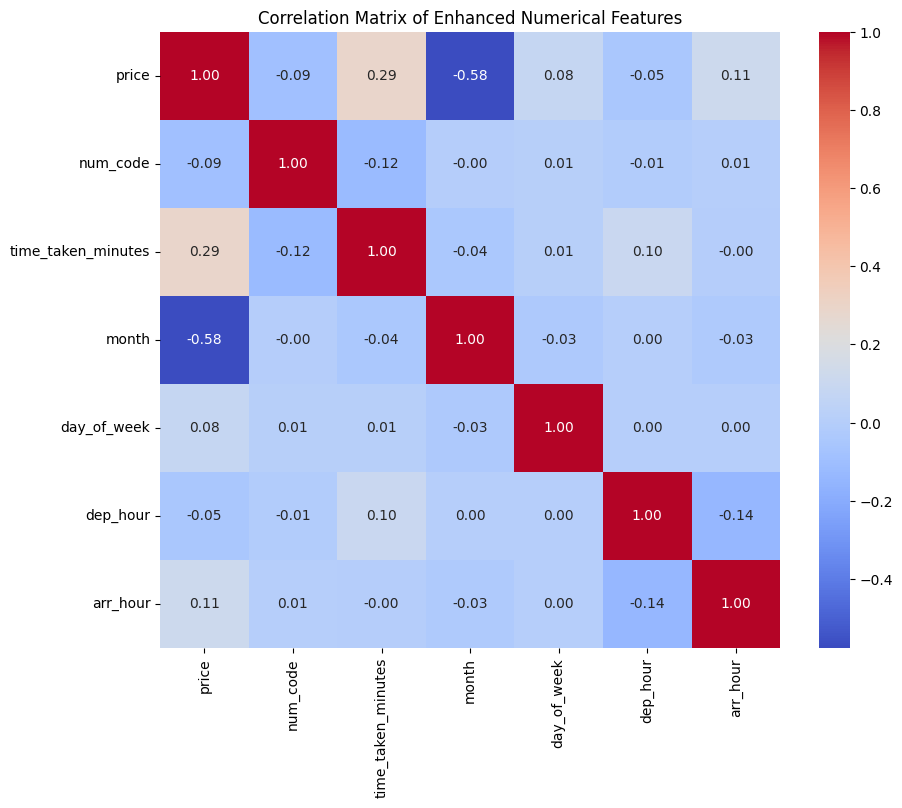

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant numerical features for correlation analysis, including newly engineered ones
numerical_features_enhanced_for_correlation = df_enhanced[['price', 'num_code', 'time_taken_minutes', 'month', 'day_of_week', 'dep_hour', 'arr_hour']]

# Calculate the correlation matrix
correlation_matrix_enhanced = numerical_features_enhanced_for_correlation.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_enhanced, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Enhanced Numerical Features')
plt.show()

## Visualize Model Predictions

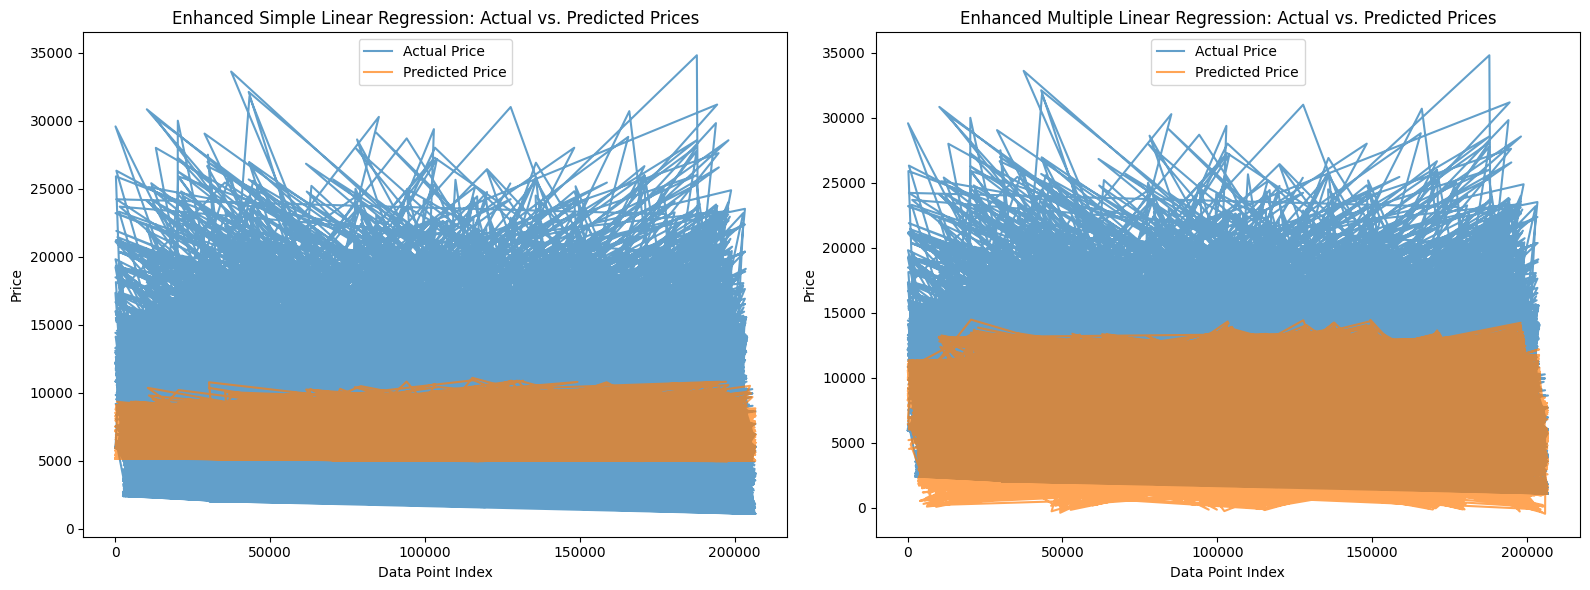

In [5]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
plt.figure(figsize=(16, 6))

# Subplot 1: Enhanced Simple Linear Regression
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
plt.plot(y_simple_enhanced_test.index, y_simple_enhanced_test, label='Actual Price', alpha=0.7)
plt.plot(y_simple_enhanced_test.index, y_simple_enhanced_pred, label='Predicted Price', alpha=0.7)
plt.title('Enhanced Simple Linear Regression: Actual vs. Predicted Prices')
plt.xlabel('Data Point Index')
plt.ylabel('Price')
plt.legend()

# Subplot 2: Enhanced Multiple Linear Regression
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
plt.plot(y_multi_enhanced_test.index, y_multi_enhanced_test, label='Actual Price', alpha=0.7)
plt.plot(y_multi_enhanced_test.index, y_multi_enhanced_pred, label='Predicted Price', alpha=0.7)
plt.title('Enhanced Multiple Linear Regression: Actual vs. Predicted Prices')
plt.xlabel('Data Point Index')
plt.ylabel('Price')
plt.legend()

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()